In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from matplotlib import animation
import random

In [2]:
logging.basicConfig(level = logging.INFO, format = '%(message)s')

Monte Carlo Control.
[[-2.91589512 -2.69651383 -4.39459386 -1.16272862]
 [-1.09       -0.1439486  -2.14138    -0.5054149 ]
 [-0.1         1.         -1.6543     -0.1       ]
 [-2.7636752  -3.14589198 -2.675683   -0.2106563 ]
 [-1.39182625 -1.74339998 -1.50821313  1.        ]
 [ 0.          0.          0.          0.        ]
 [-1.47380594 -3.05479669 -4.18622075 -3.27005643]
 [-1.451383   -3.12594773 -3.98449387 -0.13022901]
 [ 1.         -0.1        -1.09       -0.1       ]]


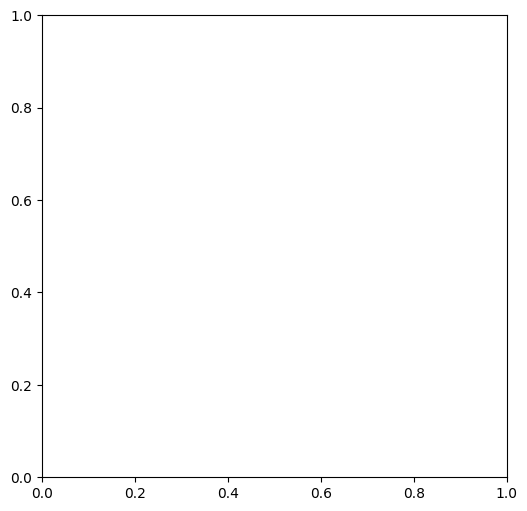

In [6]:
class MonteCarlo():
    def __init__(self, n_rows = 3, n_cols = 3, goal_point = 5, gamma = 0.9, episodes = 1000, epsilon = 0.1):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.n_states = n_rows * n_cols
        self.actions = ['up', 'down', 'left', 'right']
        self.gamma = gamma
        self.goal_point = goal_point
        self.v = np.zeros(self.n_states)
        self.q = np.zeros((self.n_states, len(self.actions)))
        self.returns = {(state, action): [] for state in range(self.n_states) for action in range(len(self.actions))}
        self.frames = []
        self.iteration_counts = []
        self.episodes = episodes
        self.epsilon = epsilon

    def transition_reward(self, state, action):
        row, col = divmod(state, self.n_cols)

        if action == 'up':
            next_row, next_col = max(row - 1, 0), col

        elif action == 'down':
            next_row, next_col = min(row + 1, self.n_rows - 1), col

        elif action == 'left':
            next_row, next_col = row, max(0, col - 1)

        elif action == 'right':
            next_row, next_col = row, min(col + 1, self.n_cols - 1)

        next_state = next_row * self.n_cols + next_col
        reward = 1 if next_state == self.goal_point else -1
        return next_state, reward

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, len(self.actions) - 1)
        else:
            return np.argmax(self.q[state])
        
    def generate_episode(self):
        episode = []
        state = random.randint(0, self.n_states - 1)

        while state != self.goal_point:
            action = self.choose_action(state)
            next_state, reward = self.transition_reward(state, self.actions[action])
            episode.append((state, action, reward))
            state = next_state

        return episode
    
    def first_visit_monte_carlo_control(self):
        print("Monte Carlo Control.")
        for episode_idx in range(self.episodes):
            episode = self.generate_episode()
            g = 0
            visited_state_action_pairs = set()

            for state, action, reward in reversed(episode):
                g = reward + self.gamma * g
                if (state, action) not in visited_state_action_pairs:
                    visited_state_action_pairs.add((state, action))
                    self.returns[(state,action)].append(g)
                    self.q[state, action] = np.mean(self.returns[(state, action)])

                    self.v[state] = np.max(self.q[state])

            self.frames.append(self.v.copy())
            self.iteration_counts.append(episode_idx)
        print(self.q)
        
        def every_visit_monte_carlo_control(self):
            episode = self.generate_episode()
            N_s_a = {(state, action):0 for state in range(len(self.states)) for action in range(len(self.actions))}
            g = 0

            for state, action, reward in reversed(episode):
                N_s_a[(state, action)] += 1
                g = reward + self.gamma * g
                self.returns[(state, action)].append(g)
            
            for state, action in enumerate(self.returns):
                self.q[state, action] = (self.returns[state, action]/N_s_a[state, action])

        def incremental_first_visit_monte_carlo(self):
            episode = self.generate_episode()
            first_visit_indices = {}
            for t, (state, action, _) in enumerate(episode):
                if (state, action) not in first_visit_indices:
                    first_visit_indices[(state, action)] = t
            g = 0

            for t in range(reversed(len(episode))):
                state, action, reward = episode[t]
                g = reward + self.gamma * g
                if first_visit_indices[(state, action)] == t:
                    self.q[(state, action)] = self.q([state, action]) + self.alpha * (g - self.q[(state, action)])

            



    def animate(self):
        # 애니메이션 생성: 각 에피소드 후의 상태 가치 함수를 시각화
        fig, ax = plt.subplots(figsize=(6, 6))

        def update(frame_idx):
            ax.clear()
            v = self.frames[frame_idx]
            iteration = self.iteration_counts[frame_idx]
            ax.imshow(v.reshape(self.n_rows, self.n_cols), cmap='coolwarm', interpolation='none')
            ax.set_title(f'Episode: {iteration}, Destination: {self.goal_point}')

            for i in range(self.n_rows):
                for j in range(self.n_cols):
                    state = i * self.n_cols + j
                    state_value = v[state]
                    ax.text(j, i, f'{state_value:.2f}', ha='center', va='center', color='black')

            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])

        ani = animation.FuncAnimation(fig, update, frames=len(self.frames), interval=300, repeat=False)
        plt.show()

if __name__ == '__main__':
    # 프로그램 시작: 목표 상태를 입력받고 Monte Carlo Control 실행
    goal_point = int(input('goal_point 의 index를 정수로 입력하세요 : '))
    mc = MonteCarlo(n_rows=3, n_cols=3, goal_point=5)
    mc.first_visit_monte_carlo_control()  # Monte Carlo Control 알고리즘 실행
    mc.animate()

